In [1]:
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import skimage
import pytesseract
import cv2
from PIL import Image, ImageEnhance, ImageFilter

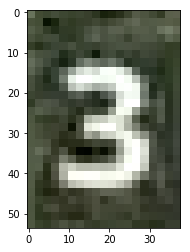

In [23]:
## Load original image
image_path = os.path.join(os.environ.get("DATA_DIR"),'3.png')
# read the image file in a numpy array
img = mpimg.imread(image_path)
imgplot = plt.imshow(img)


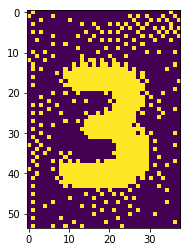

In [24]:
# Experiment 1
im = Image.open(image_path) # the second one
im = im.filter(ImageFilter.MedianFilter())
enhancer = ImageEnhance.Contrast(im)
im = enhancer.enhance(2)
im = im.convert('1')
im.save(os.environ.get("SHARED_OUTPUT_DIR")+'temp1.png')
text = pytesseract.image_to_string(Image.open(os.environ.get("SHARED_OUTPUT_DIR")+'temp1.png'))
print(text)
temp_image_path = os.path.join(os.environ.get("SHARED_OUTPUT_DIR")+'temp1.png')
# read the image file in a numpy array
img = mpimg.imread(temp_image_path)
imgplot = plt.imshow(img)

(54, 38, 3)
L.'J


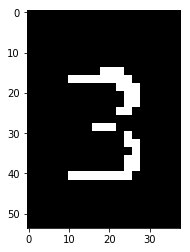

In [25]:
# Experiment 2
def _thresh_words(img, white_thresh=230):
    if img is None:
        return
    print img.shape
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if all([elem >= white_thresh for elem in img[i][j]]):
                img[i][j] = (255, 255, 255)
            else:
                img[i][j] = (0, 0, 0)
    cv2.imwrite(os.environ.get("SHARED_OUTPUT_DIR")+'ex2_1.png', img)

def _exec_tesseract(temp_path):
     cmd = 'env TESSDATA_PREFIX=./ tesseract -l joh %s %s > /dev/null' % (self._tmp_image_fname, self._tmp_txt_base)
     os.system(cmd)
    
img = cv2.imread(image_path)
image_threshold = _thresh_words(img)
temp_image_path = os.path.join(os.environ.get("SHARED_OUTPUT_DIR")+'ex2_1.png')
# read the image file in a numpy array
img1 = mpimg.imread(temp_image_path)
plt.imshow(img1)
text = pytesseract.image_to_string(Image.open(temp_image_path))
print text

In [14]:
#http://stackoverflow.com/questions/18813300/finding-the-coordinates-of-maxima-in-an-image
import os
from PIL import *
from PIL import Image

im111 = Image.open(os.environ.get("DATA_DIR")+'/3.png')

In [27]:
import numpy as np
from skimage import io
from skimage import img_as_float
from scipy.ndimage import gaussian_filter
from skimage.morphology import reconstruction
import pytesseract

<class 'PIL.Image.Image'>



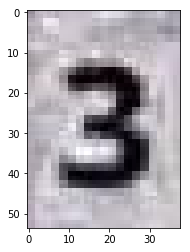

In [28]:
im = np.array(image * 255, dtype = np.uint8)
a = np.asarray(im)
img = Image.fromarray(a)

img.show()

print type(img)
img.save(os.environ.get("SHARED_OUTPUT_DIR")+'RegionalMaximaPIL.jpg')

img1 = mpimg.imread(os.environ.get("SHARED_OUTPUT_DIR")+'RegionalMaximaPIL.jpg')
plt.imshow(img1)
text = pytesseract.image_to_string(Image.open(os.environ.get("SHARED_OUTPUT_DIR")+'RegionalMaximaPIL.jpg'))
print text

In [53]:
# Working over image for number of kills 
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from scipy.ndimage import gaussian_filter
from skimage import data
from skimage import img_as_float
from skimage.morphology import reconstruction

# Convert to float: Important for subtraction later which won't work with uint8
image = Image.open(os.environ.get("DATA_DIR")+'/3.png')
#image = Image.open(os.environ.get("DATA_DIR")+'/hard.png')
# image = Image.open(os.environ.get("DATA_DIR")+'/1.png')
basewidth = 100
wpercent = (basewidth / float(image.size[0]))
hsize = int((float(im111.size[1]) * float(wpercent)))
image_resized = im111.resize((basewidth, hsize), Image.ANTIALIAS)
image = gaussian_filter(image, 0.4)

seed = np.copy(image)
seed[1:-1, 1:-1] = image.min()
mask = image

dilated = reconstruction(seed, mask, method='dilation')


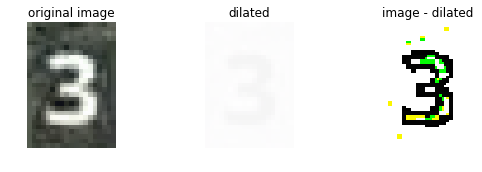

In [54]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,
                                    ncols=3,
                                    figsize=(8, 2.5),
                                    sharex=True,
                                    sharey=True)

ax0.imshow(image, cmap='gray')
ax0.set_title('original image')
ax0.axis('off')
ax0.set_adjustable('box-forced')

ax1.imshow(dilated, vmin=image.min(), vmax=image.max(), cmap='gray')
ax1.set_title('dilated')
ax1.axis('off')
ax1.set_adjustable('box-forced')

img_mid = image - dilated
ax2.imshow(img_mid, cmap='gray')
ax2.set_title('image - dilated')
ax2.axis('off')
ax2.set_adjustable('box-forced')

fig.tight_layout()

img_sub_dilated = img_mid
image_1 = Image.fromarray(np.uint8(img_sub_dilated))
text = pytesseract.image_to_string(image_1)
print text

In [38]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

In [39]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [40]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [41]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [42]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [43]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
203s - loss: 0.2311 - acc: 0.9344 - val_loss: 0.0827 - val_acc: 0.9741
Epoch 2/10
203s - loss: 0.0738 - acc: 0.9779 - val_loss: 0.0466 - val_acc: 0.9839
Epoch 3/10
204s - loss: 0.0534 - acc: 0.9838 - val_loss: 0.0427 - val_acc: 0.9865
Epoch 4/10
203s - loss: 0.0403 - acc: 0.9878 - val_loss: 0.0405 - val_acc: 0.9866
Epoch 5/10
203s - loss: 0.0337 - acc: 0.9894 - val_loss: 0.0342 - val_acc: 0.9889
Epoch 6/10
204s - loss: 0.0274 - acc: 0.9916 - val_loss: 0.0305 - val_acc: 0.9902
Epoch 7/10
204s - loss: 0.0232 - acc: 0.9927 - val_loss: 0.0351 - val_acc: 0.9887
Epoch 8/10
203s - loss: 0.0201 - acc: 0.9937 - val_loss: 0.0328 - val_acc: 0.9886
Epoch 9/10
204s - loss: 0.0166 - acc: 0.9949 - val_loss: 0.0301 - val_acc: 0.9897
Epoch 10/10
203s - loss: 0.0141 - acc: 0.9959 - val_loss: 0.0304 - val_acc: 0.9901
Baseline Error: 0.99%


In [52]:
print type(X_test)
print X_test.shape
X_ex = X_test[1:2,:,:,:]
print X_ex.shape

predictions = model.predict(X_ex)
print np.argmax(predictions[0])

<type 'numpy.ndarray'>
(10000, 1, 28, 28)
(1, 1, 28, 28)
2


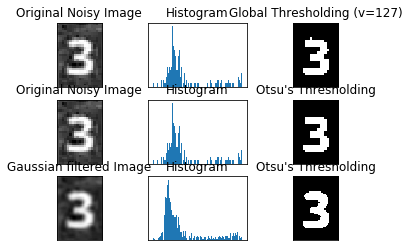

In [80]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter
image_path = os.environ.get("DATA_DIR")+'/3.png'
img = cv2.imread(image_path,0)
# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in xrange(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

In [81]:
y = cv2.resize(th3,(28,28), interpolation = cv2.INTER_CUBIC)
y = np.expand_dims(y, axis=0)
y = np.expand_dims(y, axis=0)

In [82]:
test_example = th3
predictions = model.predict(y)
print np.argmax(predictions[0])

3


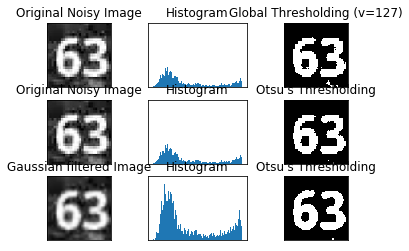

In [138]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter
image_path = os.environ.get("DATA_DIR")+'/63.png'
img = cv2.imread(image_path,0)
img = cv2.resize(img,(80,80), interpolation = cv2.INTER_CUBIC)
# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in xrange(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

(80, 80)
80 80
(80, 45)
(80, 40)


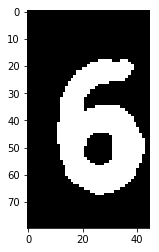

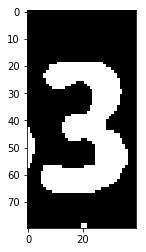

In [139]:
print th3.shape
x, y = th3.shape[0],th3.shape[1]
print x, y
th3_left = th3[:,:x/2+5]
print th3_left.shape
th3_right = th3[:,x/2:]
print th3_right.shape
plt.imshow(th3_left,'gray')
plt.show()
y_left = cv2.resize(th3_left,(28,28), interpolation = cv2.INTER_CUBIC)
y_left = np.expand_dims(y_left, axis=0)
y_left = np.expand_dims(y_left, axis=0)

plt.imshow(th3_right,'gray')
plt.show()
y_right = cv2.resize(th3_right,(28,28), interpolation = cv2.INTER_CUBIC)
y_right = np.expand_dims(y_right, axis=0)
y_right = np.expand_dims(y_right, axis=0)

In [140]:
predictions = model.predict(y_left)
print np.argmax(predictions[0])
print np.max(predictions[0])

6
1.0


In [141]:
predictions = model.predict(y_right)
print np.argmax(predictions[0])
print np.max(predictions[0])

3
1.0
